# Step 1 : Importing important libraries

In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.gridspec as gridspec
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings

#Step 2: Load the data

In [32]:
train = pd.read_csv('cs-training.csv')
test = pd.read_csv('cs-test.csv')
train.head(3)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


# Step 3 : Understanding the data 
### Seeing the distribution of dataset in order to understand the data.


In [37]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Number of nulls', 'Values'])

for i, var in enumerate(train.columns):
    variables.loc[i] = [var, train[var].nunique(), train[var].isnull().sum(), train[var].unique().tolist()]
v_dict = pd.read_excel('Data Dictionary.xls', index_col=0)
variables.set_index('Variable').join(v_dict)

,Number of unique values,Number of nulls,Values,Unnamed: 1,Unnamed: 2
Variable,,,,,
Unnamed: 0,150000,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN
SeriousDlqin2yrs,2,0,"[1, 0]",Person experienced 90 days past due delinquenc...,Y/N
RevolvingUtilizationOfUnsecuredLines,125728,0,"[0.766126609, 0.957151019, 0.65818014, 0.23380...",Total balance on credit cards and personal lin...,percentage
age,86,0,"[45, 40, 38, 30, 49, 74, 57, 39, 27, 51, 46, 7...",Age of borrower in years,integer
NumberOfTime30-59DaysPastDueNotWorse,16,0,"[2, 0, 1, 3, 4, 5, 7, 10, 6, 98, 12, 8, 9, 96,...",Number of times borrower has been 30-59 days p...,integer
DebtRatio,114194,0,"[0.802982129, 0.121876201, 0.085113375, 0.0360...","Monthly debt payments, alimony,living costs di...",percentage
MonthlyIncome,13594,29731,"[9120.0, 2600.0, 3042.0, 3300.0, 63588.0, 3500...",Monthly income,real
NumberOfOpenCreditLinesAndLoans,58,0,"[13, 4, 2, 5, 7, 3, 8, 9, 6, 10, 14, 22, 17, 1...",Number of Open loans (installment like car loa...,integer
NumberOfTimes90DaysLate,19,0,"[0, 1, 3, 2, 5, 4, 98, 10, 9, 6, 7, 8, 15, 96,...",Number of times borrower has been 90 days or m...,integer


### Checking the number of null columns in each variable.



In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

### Representing number of null column in terms of percentage for each column to check if percentage of null cells is more than 10% or not. If yes will try to remove that column

In [39]:
for i in range(train.shape[1]):
    n_miss = train.iloc[:,i].isnull().sum()
    perc = n_miss / train.shape[0] * 100
    print('%d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

0, Missing: 0 (0.0%)
1, Missing: 0 (0.0%)
2, Missing: 0 (0.0%)
3, Missing: 0 (0.0%)
4, Missing: 0 (0.0%)
5, Missing: 0 (0.0%)
6, Missing: 29731 (19.8%)
7, Missing: 0 (0.0%)
8, Missing: 0 (0.0%)
9, Missing: 0 (0.0%)
10, Missing: 0 (0.0%)
11, Missing: 3924 (2.6%)


# Step 4 : Visualization

### Visualization of numbercal data of columns using box plot. These charts display ranges within variables measured.

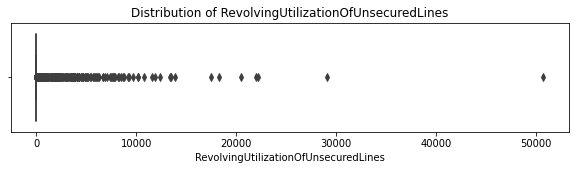

In [40]:
plt.figure(figsize=(10,2))
sns.boxplot(data=train, x='RevolvingUtilizationOfUnsecuredLines')
plt.title("Distribution of RevolvingUtilizationOfUnsecuredLines");

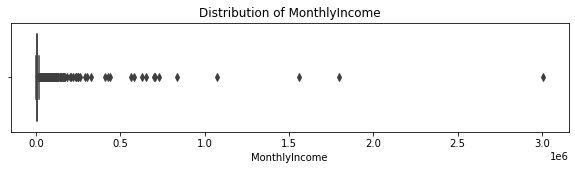

In [41]:
plt.figure(figsize=(10,2))
sns.boxplot(data=train, x='MonthlyIncome')
plt.title("Distribution of MonthlyIncome");

# Step 5 : Removing skewness

Skewness is a measure of symmetry, or more precisely, the lack of symmetry.
· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
· If the skewness is less than -1 or greater than 1, the data are highly skewed

In [42]:
skew =train.skew().sort_values(ascending =False )
skew_df= pd.DataFrame({'skew':skew})
skew_df.head(10)

,skew
MonthlyIncome,114.040318
RevolvingUtilizationOfUnsecuredLines,97.631574
DebtRatio,95.157793
NumberOfTime60-89DaysPastDueNotWorse,23.331743
NumberOfTimes90DaysLate,23.087345
NumberOfTime30-59DaysPastDueNotWorse,22.597108
NumberRealEstateLoansOrLines,3.482484
SeriousDlqin2yrs,3.468857
NumberOfDependents,1.588242
NumberOfOpenCreditLinesAndLoans,1.215314


## **Our Data is Highly skewed , we corrected values which are highly skewed below before modeling**

### Before correcting, monthly income dist plot.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


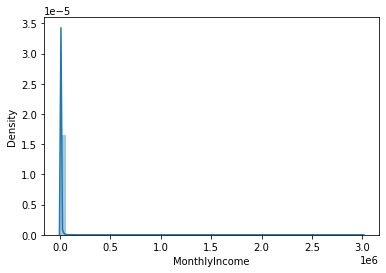

In [10]:
ax = sns.distplot(train['MonthlyIncome'])

## After correcting, monthly income dist plot.

-4.364719539338408


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


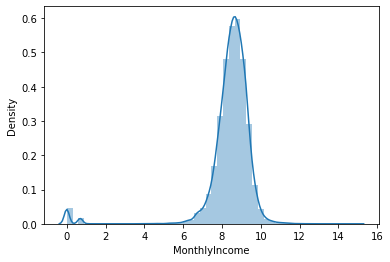

In [11]:
amount_corrected= np.log(train['MonthlyIncome' ]+1)
train['DebtRatio'] = amount_corrected.skew()
print(amount_corrected.skew())
ax = sns.distplot(amount_corrected)

Similarly for other values.

11.704798483586039


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


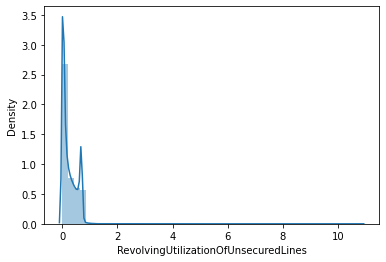

In [12]:
amount_corrected= np.log(train['RevolvingUtilizationOfUnsecuredLines']+1)
train['DebtRatio'] = amount_corrected.skew()
print(amount_corrected.skew())
ax = sns.distplot(amount_corrected)

0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


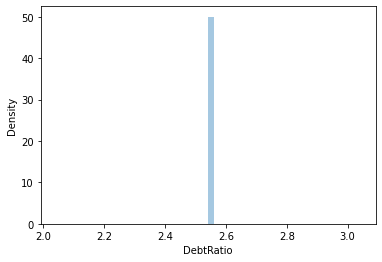

In [13]:
amount_corrected= np.log(train['DebtRatio']+1)
train['DebtRatio'] = amount_corrected.skew()
print(amount_corrected.skew())
ax = sns.distplot(amount_corrected)

# Step 6 : Remove low variance value variable 
Features with low variance should be eliminated


In [15]:
var= train.var().sort_values(ascending =True )
var_df= pd.DataFrame({'var':var})
var_df.head(10)

,var
DebtRatio,0.000000
SeriousDlqin2yrs,0.062373
NumberOfDependents,1.243417
NumberRealEstateLoansOrLines,1.276382
NumberOfTime60-89DaysPastDueNotWorse,17.265516
NumberOfTimes90DaysLate,17.383094
NumberOfTime30-59DaysPastDueNotWorse,17.579415
NumberOfOpenCreditLinesAndLoans,26.480812
age,218.208021
RevolvingUtilizationOfUnsecuredLines,62377.745156


# Removing Outliers

Identifying outliers in data is an important part of statistical analyses. One simple rule of thumb (due to John Tukey) for finding outliers is based on the quartiles of the data: the first quartile Q1 is >= 0.25 of the data, the second quartile Q2 >= 0.50 of the data, and the third quartile Q3 >= 0.75 of the data. The interquartile range is IQR = Q3-Q1. 

In [16]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

train_val = train.select_dtypes(exclude=['category']) 
df_out = train_val[~((train_val < (Q1 - 1.5 * IQR))|(train_val > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(100701, 12)


### (100701, 12) this is the shape of data keeped after eliminating outliers


# Arranging the high correlation values with the probability of loan accordingly

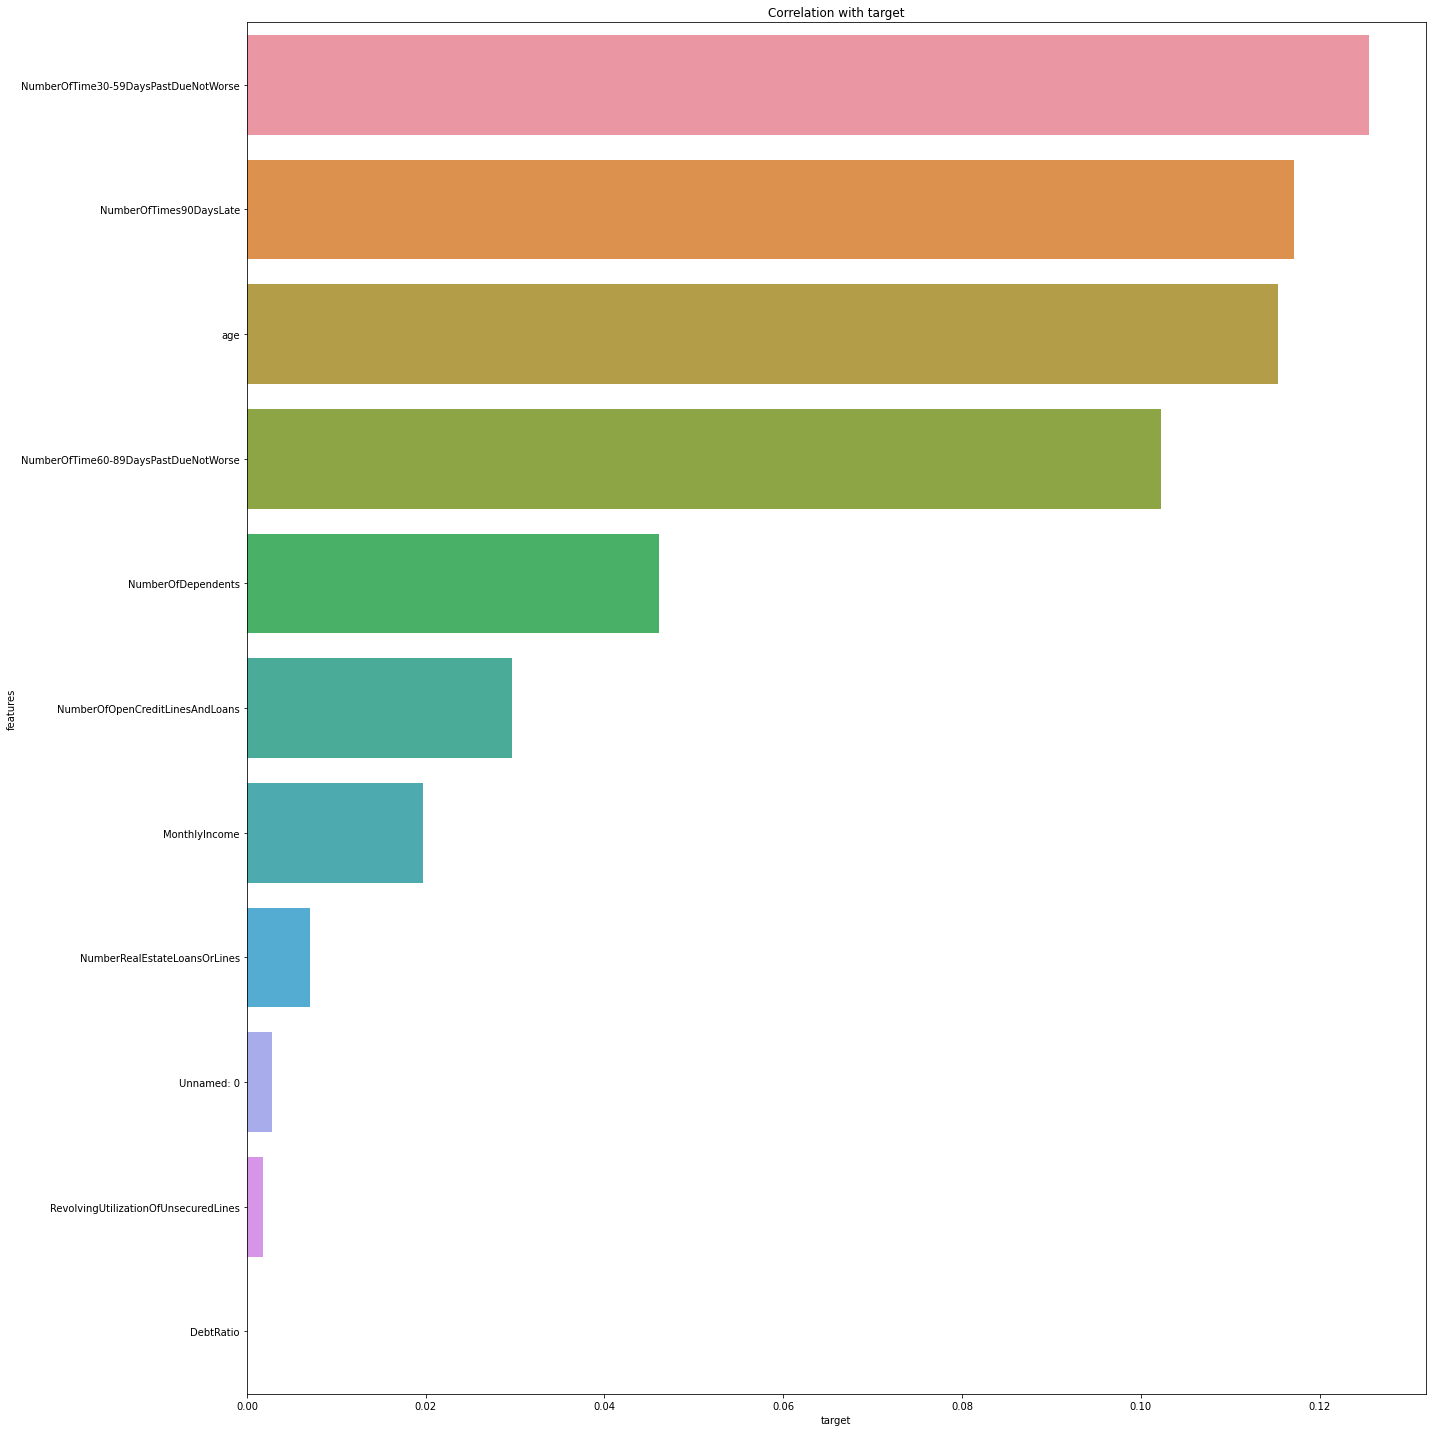

In [18]:
corrmat = train.corr()
corr_with_target = corrmat['SeriousDlqin2yrs'].apply(abs).sort_values(ascending=False)
corr_with_target.drop(['SeriousDlqin2yrs'], inplace=True)
df = pd.DataFrame(data={'features': corr_with_target.index, 'target': corr_with_target.values})
plt.figure(figsize=(20, 20))
sns.barplot(x="target", y="features", data=df)
plt.title('Correlation with target')
plt.tight_layout()
plt.show()

In [17]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


### Our target value is SeriousDlqin2yrs so we will store in variable y and rest data in X for prediction

In [19]:
target= "SeriousDlqin2yrs"
X = train.drop(['SeriousDlqin2yrs','Unnamed: 0'], axis='columns')
y = train[target]

### Splitting the dataset in ratio of 80:20 for training and testing dataset respectively.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0,stratify=y )
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

30000 rows in test set vs. 120000 in training set. 10 Features.
